In [30]:
import kwant
import numpy as np 
import matplotlib.pyplot as plt 

sigma = np.array([[[0, 1], [1, 0]],
                  [[0, 1j], [-1j, 0]],
                  [[1, 0], [0, -1]],
                  [[1, 0],[0, 1]]])
lat_h = kwant.lattice.chain(norbs=1)
bulk_h = kwant.Builder(symmetry=kwant.lattice.TranslationalSymmetry([2]))

lat_a = kwant.lattice.chain(norbs=1)
bulk_a = kwant.Builder(symmetry=kwant.lattice.TranslationalSymmetry([2]))

def onsite_h(site):
    return 0

def hopping_hintra(site1, site2, t1):
    return t1

def hopping_hinter(site1, site2, t2):
    return t2

bulk_h[lat_h(0)] = onsite_h
bulk_h[lat_h(1)] = onsite_h
bulk_h[lat_h(0),lat_h(1)] = hopping_hintra
bulk_h[lat_h(1),lat_h(2)] = hopping_hinter


def onsite_a(site):
    return 0 

def hopping_aintra(site1, site2, v1):
    return 1j*v1

bulk_a[lat_a(0)] = onsite_a
bulk_a[lat_a(1)] = onsite_a
bulk_a[lat_a(0),lat_a(1)] = hopping_aintra
bulk_a[lat_a(1),lat_a(2)] = 0



finite_h = kwant.Builder()
finite_a = kwant.Builder()

L = 50

def shape(site):
    pos=site.pos
    return -L/2<pos[0]<=L/2

finite_h.fill(bulk_h, shape, start=[0]);
finite_a.fill(bulk_a, shape, start=[0]);

finite_h = finite_h.finalized()
finite_a = finite_a.finalized()




In [31]:
eigenvalues = []
#from np import array

t1 = -2.2
t2 = 1
ts= np.arange(0, 2.1, 0.1)
for t1 in ts:
    aux = t1
    params_h = dict(t1=aux, t2=1)
    ham_h = finite_h.hamiltonian_submatrix(params = params_h)
    params_a = dict(v1=0.1)
    ham_a = finite_a.hamiltonian_submatrix(params = params_a)
    ham_tot = ham_h +1j*ham_a
    evals, evecs = np.linalg.eig(ham_tot)
    order = np.argsort(evals.real)                                        #HERE WAS THE ERROR, I WAS GETTING A TUPLE BECAUSE I  WAS NOT SAVING 
    eigenvalues.append(evals[order])                #EVALS AND EVECS IN SEPARATE SLOTS 
    
    
print(len(eigenvalues))
print(len(eigenvalues[0]))
print(type(eigenvalues))
eigenvalues = np.array(eigenvalues) #this turns a list of arrays into a matrix so i can run indices 
print(eigenvalues.shape)

21
50
<class 'list'>
(21, 50)


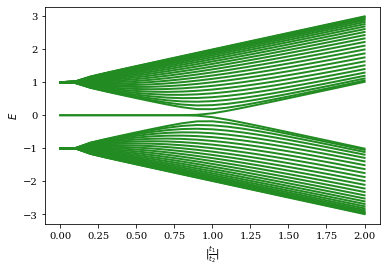

In [32]:
plt.plot(ts, eigenvalues.real,linewidth=2 ,c='forestgreen')
plt.rcParams["font.family"] = "serif"
plt.xlabel(r'$|\frac{t_1}{t_2}|$')
plt.ylabel(r'$E$')
SMALL_SIZE= 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)
#plt.plot(0,0, 'x', c='b')
#plt.text(-0.07,0.010, "EP")


plt.savefig("/Users/albertozorzato/Desktop/plt/evensitesSSH.pdf", bbox_inches='tight')
    